In [ ]:
# Importing libraries

# For numerical computation on nd-arrays
import numpy as np

# For data analysis and manipulations with dataset
import pandas as pd
pd.set_option("display.max_columns", None)

# Data visualization library
import matplotlib.pyplot as plt

# Data visualization library built upon matplotlib
import seaborn as sns

# To ignore warnings related to versions mismatch or updates
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
            'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
            'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login',
            'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
            'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
            'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
            'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'intrusion_type']

In [ ]:
# Dataset -http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz
df = pd.read_csv('http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz', names = features, header = None)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
print('Number of data points: ',df.shape[0])
print('Number of features: ', df.shape[1])

Number of data points:  494021
Number of features:  42


In [ ]:
output_labels = df['intrusion_type'].unique()
print(f"There are {len(output_labels)} output labels and are: {output_labels}")

There are 23 output labels and are: ['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


In [ ]:
# Data cleaning

In [ ]:
# Checking for null values
for index, value in df.isnull().sum().items():
    if value > 0:
        print(f"There are {value} missing values in column - {index}")


In [ ]:
# There are no null values
# Checking for duplicate rows
print(f"Duplicate rows - {df.duplicated().sum()}")

Duplicate rows - 348435


In [ ]:
# Removing duplicate rows
df.drop_duplicates(keep='first', inplace=True)
print(f"Duplicate rows - {df.duplicated().sum()}")

Duplicate rows - 0


In [ ]:
# Saving the cleaned dataset
df.to_pickle('clean_dataset.pkl')

In [ ]:
df = pd.read_pickle('clean_dataset.pkl')
df.shape

(145586, 42)

In [ ]:
# Exploratory Data Analysis

In [ ]:
# Distribution of classes in target label
dist = df['intrusion_type'].value_counts()
for name, count in dist.items():
    print(f"Number of data points in class: {name.center(17)} is", end=' ')
    print(f"{count} ({np.round(count / sum(dist) * 100, 3)}%)")


Number of data points in class:      normal.      is 87832 (60.33%)
Number of data points in class:      neptune.     is 51820 (35.594%)
Number of data points in class:       back.       is 968 (0.665%)
Number of data points in class:     teardrop.     is 918 (0.631%)
Number of data points in class:       satan.      is 906 (0.622%)
Number of data points in class:    warezclient.   is 893 (0.613%)
Number of data points in class:      ipsweep.     is 651 (0.447%)
Number of data points in class:       smurf.      is 641 (0.44%)
Number of data points in class:     portsweep.    is 416 (0.286%)
Number of data points in class:        pod.       is 206 (0.141%)
Number of data points in class:       nmap.       is 158 (0.109%)
Number of data points in class:   guess_passwd.   is 53 (0.036%)
Number of data points in class:  buffer_overflow. is 30 (0.021%)
Number of data points in class:    warezmaster.   is 20 (0.014%)
Number of data points in class:       land.       is 19 (0.013%)
Number of 

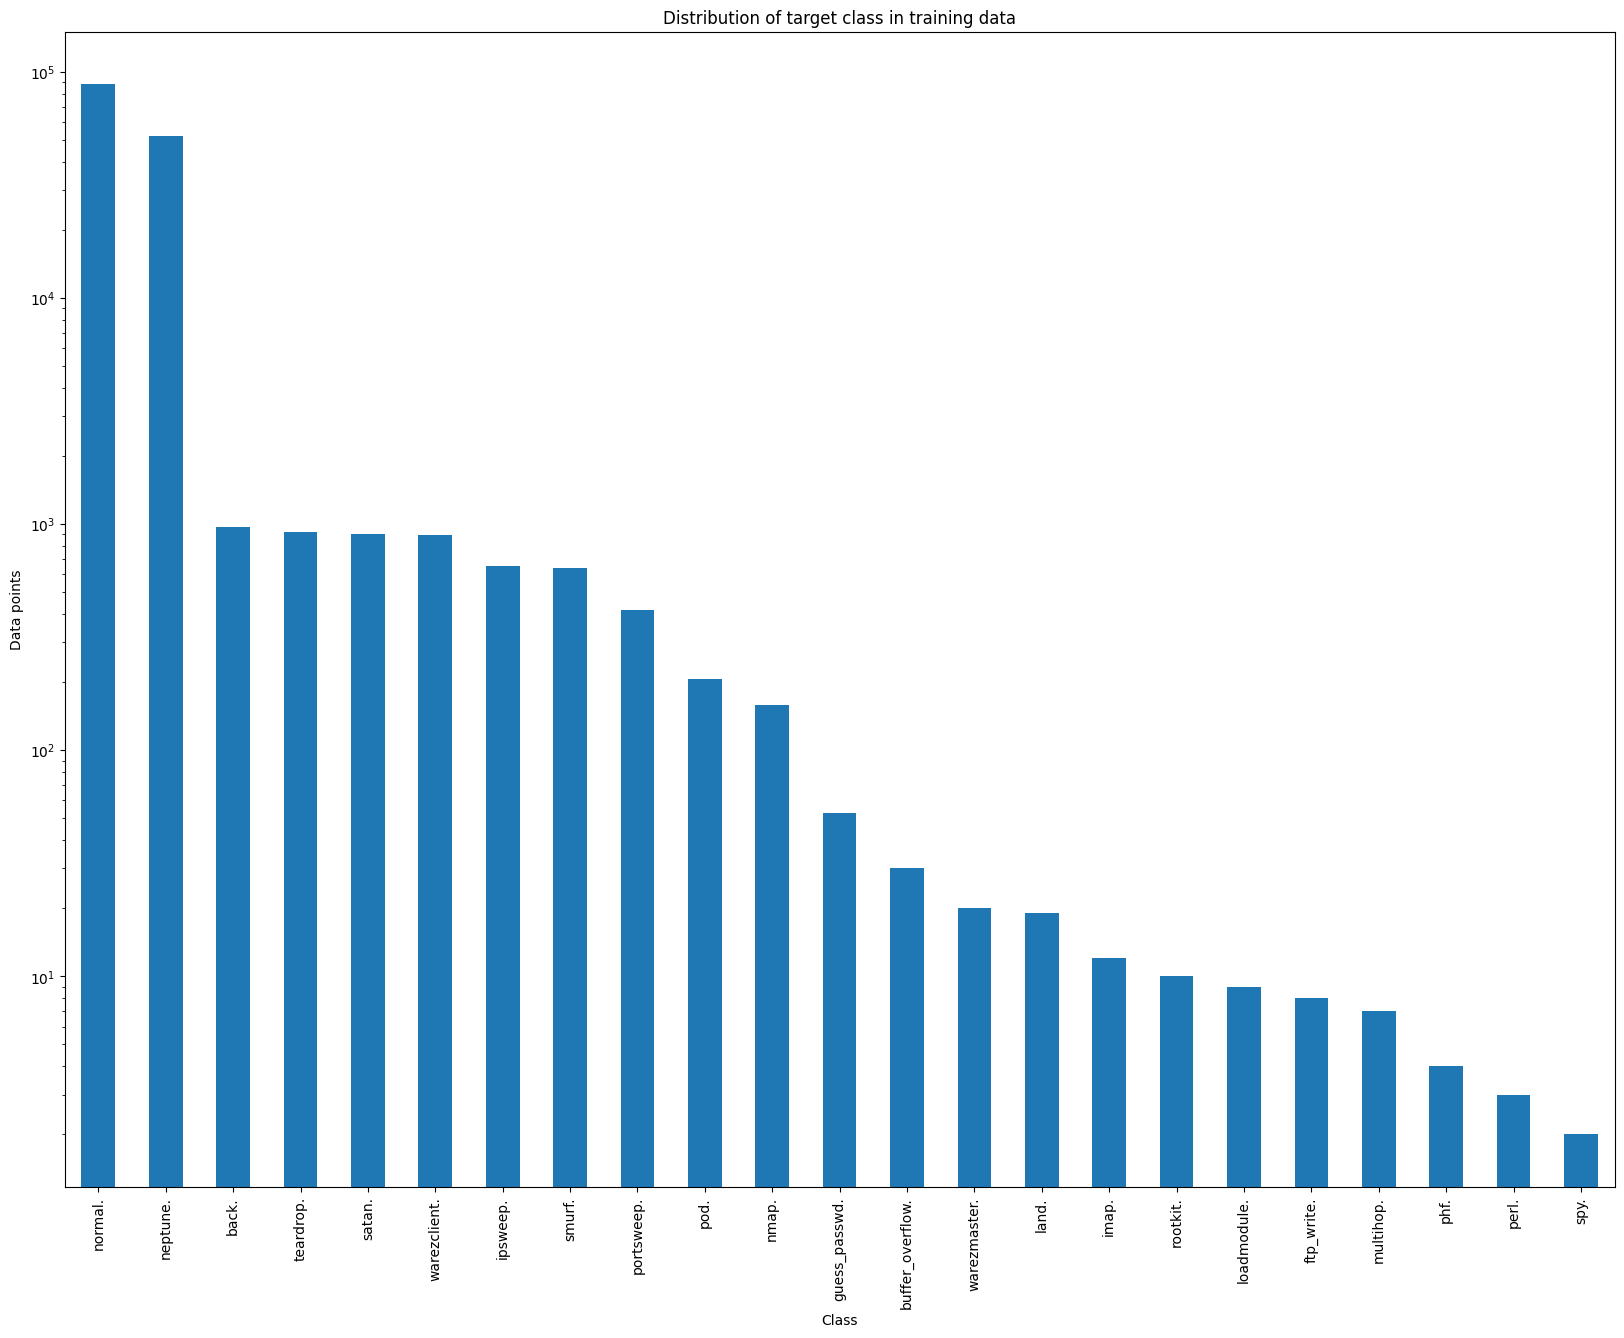

In [ ]:
plt.figure(figsize=(20,15))
plt.yscale("log")
dist.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points')
plt.title('Distribution of target class in training data')
plt.show()

In [ ]:
# Most of the data points are from "normal" (good connections) category which is around 60.33 %.

# In the categories that belong to bad connections, "neptune." (35.594 %) and "back." (0.665 %) have
# the highest no. of data points.

# Classes "rootkit.", "loadmodule.", "ftp_write.", "multihop.", "phf.", "perl.", "spy." have the least\
# no. of data points with less than 10 data points per class.

# The dataset is highly imbalanced, thus we will need to build a model which should be able to
# classify data points from these low distribution classes accurately.

# As the dataset is highly imbalanced, we will need to build a model which should be able to
# classify the INTRUSION categories accurately.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'normal.'),
  Text(1, 0, 'buffer_overflow.'),
  Text(2, 0, 'loadmodule.'),
  Text(3, 0, 'perl.'),
  Text(4, 0, 'neptune.'),
  Text(5, 0, 'smurf.'),
  Text(6, 0, 'guess_passwd.'),
  Text(7, 0, 'pod.'),
  Text(8, 0, 'teardrop.'),
  Text(9, 0, 'portsweep.'),
  Text(10, 0, 'ipsweep.'),
  Text(11, 0, 'land.'),
  Text(12, 0, 'ftp_write.'),
  Text(13, 0, 'back.'),
  Text(14, 0, 'imap.'),
  Text(15, 0, 'satan.'),
  Text(16, 0, 'phf.'),
  Text(17, 0, 'nmap.'),
  Text(18, 0, 'multihop.'),
  Text(19, 0, 'warezmaster.'),
  Text(20, 0, 'warezclient.'),
  Text(21, 0, 'spy.'),
  Text(22, 0, 'rootkit.')])

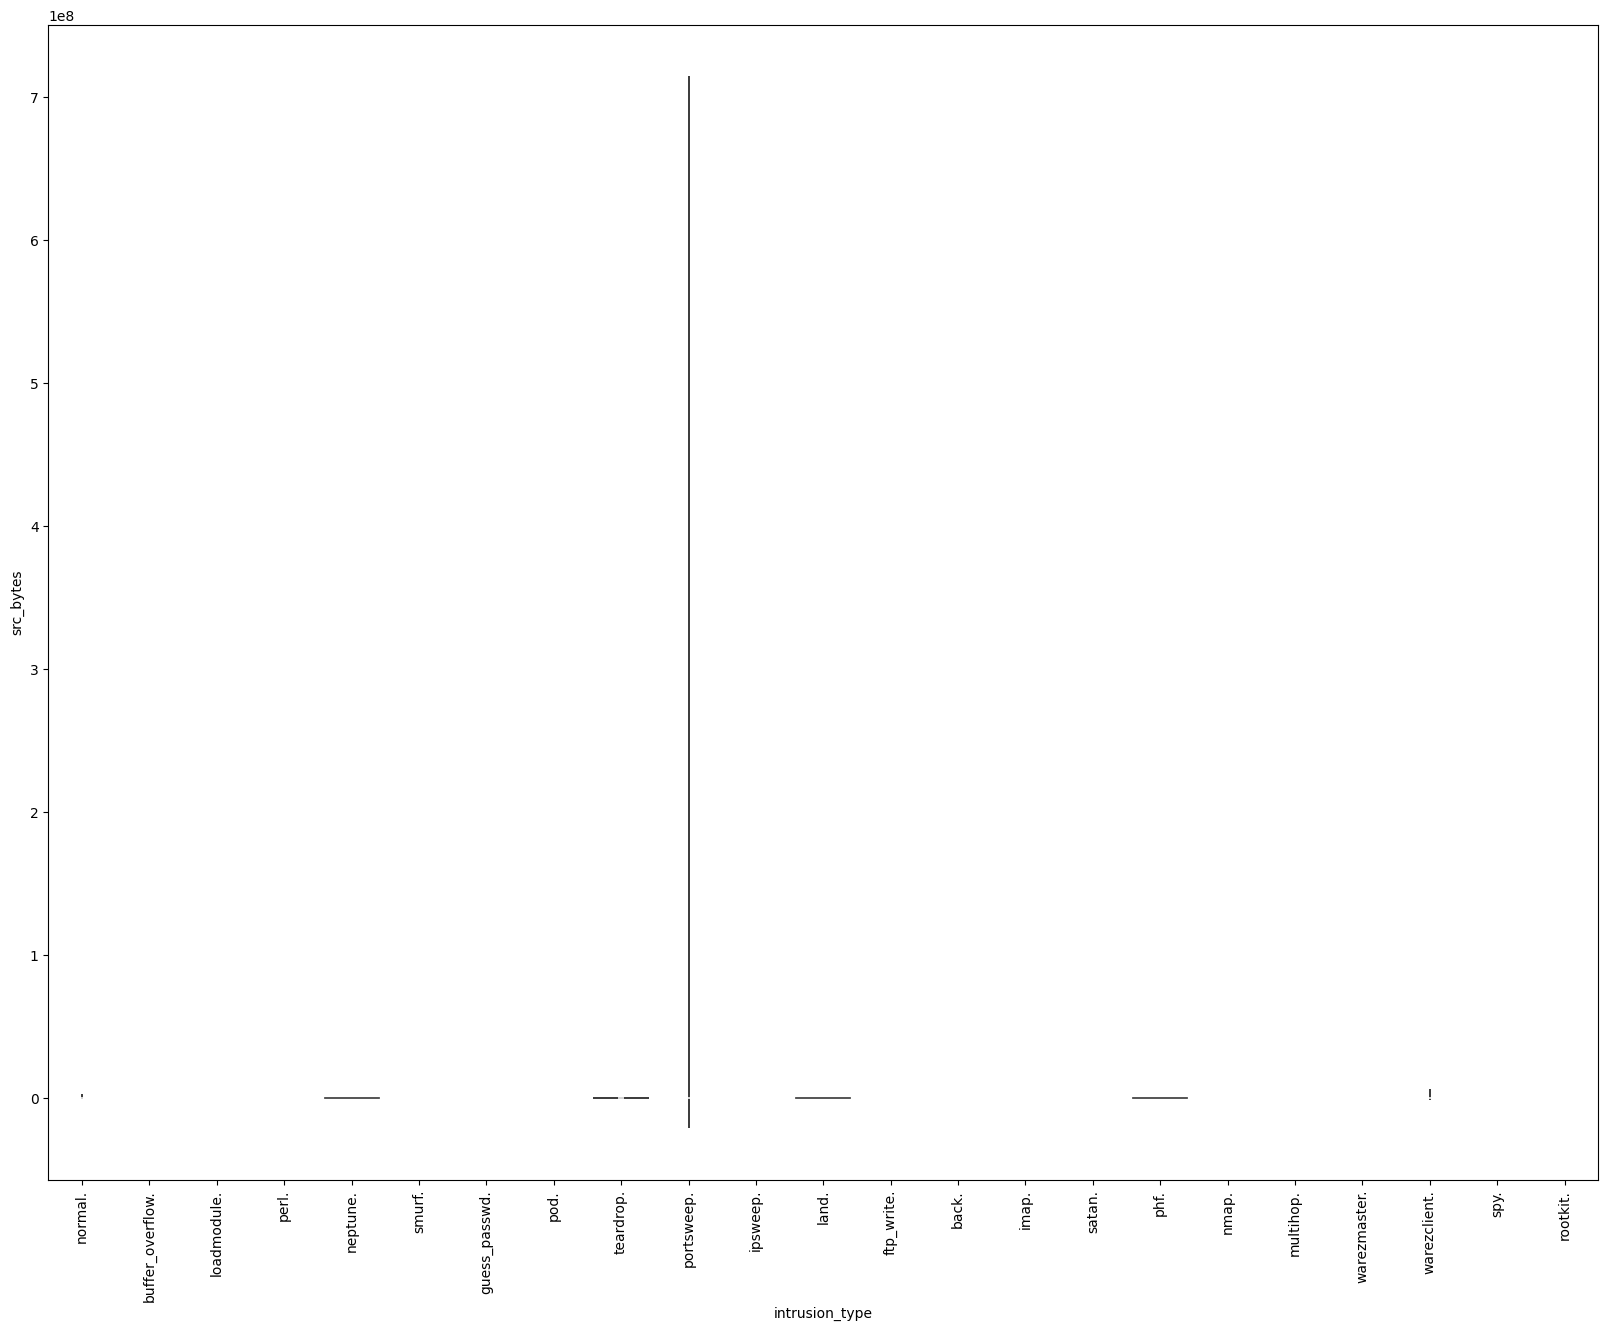

In [ ]:
# Uni-variate analysis
plt.figure(figsize=(20,15))
sns.violinplot(x="intrusion_type", y="src_bytes", data=df)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'normal.'),
  Text(1, 0, 'buffer_overflow.'),
  Text(2, 0, 'loadmodule.'),
  Text(3, 0, 'perl.'),
  Text(4, 0, 'neptune.'),
  Text(5, 0, 'smurf.'),
  Text(6, 0, 'guess_passwd.'),
  Text(7, 0, 'pod.'),
  Text(8, 0, 'teardrop.'),
  Text(9, 0, 'portsweep.'),
  Text(10, 0, 'ipsweep.'),
  Text(11, 0, 'land.'),
  Text(12, 0, 'ftp_write.'),
  Text(13, 0, 'back.'),
  Text(14, 0, 'imap.'),
  Text(15, 0, 'satan.'),
  Text(16, 0, 'phf.'),
  Text(17, 0, 'nmap.'),
  Text(18, 0, 'multihop.'),
  Text(19, 0, 'warezmaster.'),
  Text(20, 0, 'warezclient.'),
  Text(21, 0, 'spy.'),
  Text(22, 0, 'rootkit.')])

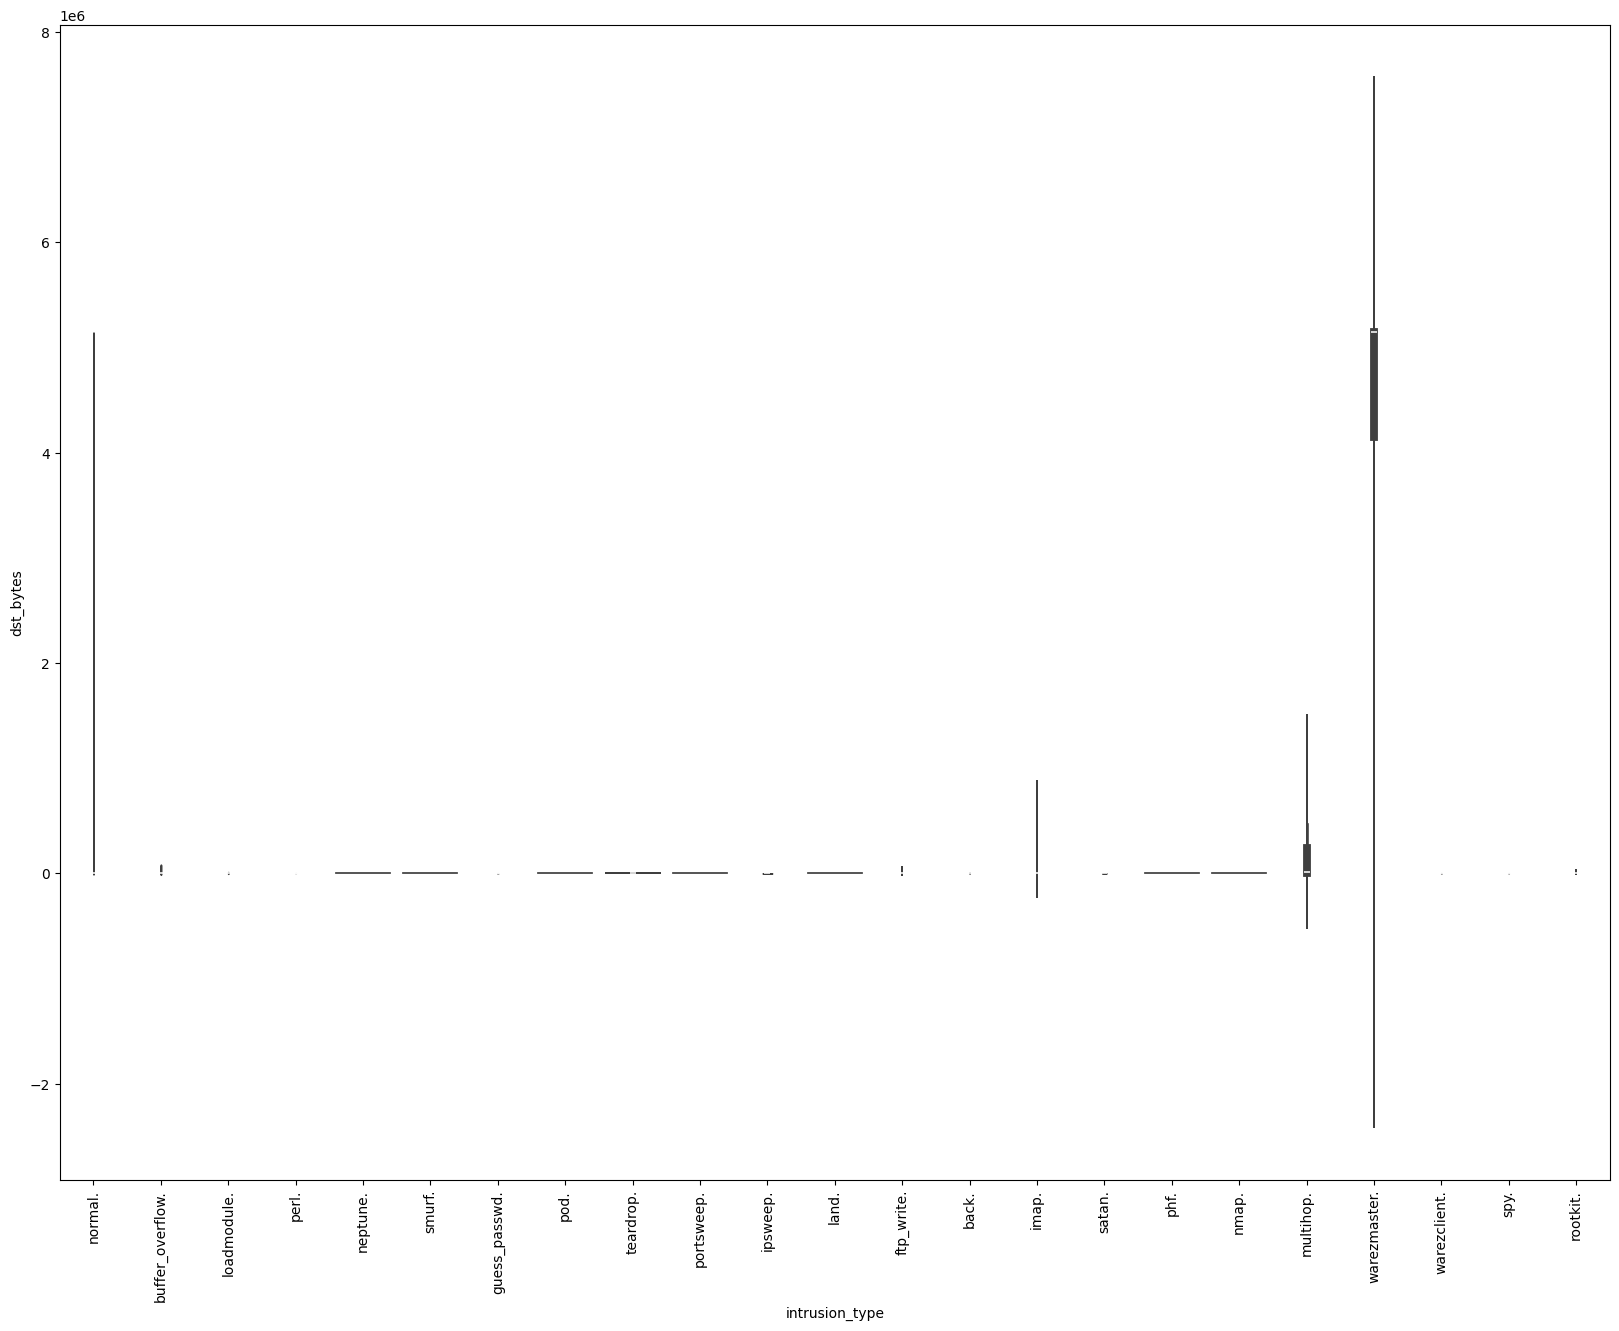

In [ ]:
plt.figure(figsize=(20,15))
sns.violinplot(x="intrusion_type", y="dst_bytes", data=df)
plt.xticks(rotation=90)

In [ ]:
# Using src_bytes as a feature for analysis, the intrusion category "portsweep" is distinguishable
# from rest of the categories

# Using dest_bytes as a feature for analysis, the intrusion categories "normal", "imap", "multihop"
# and "warezmaster" are distinguishable from rest of the categories.

# As we have relatively high no of classes, the Univariate analysis using boxplots and violin plots
# do not give us clear and satisfactory results

# Thus, we can go with pairplots for BiVariate Analysis or we can go with PCA/TSNE
# to reduce the no. of dimensions and perform Bi/Tri-Variate Analysis.

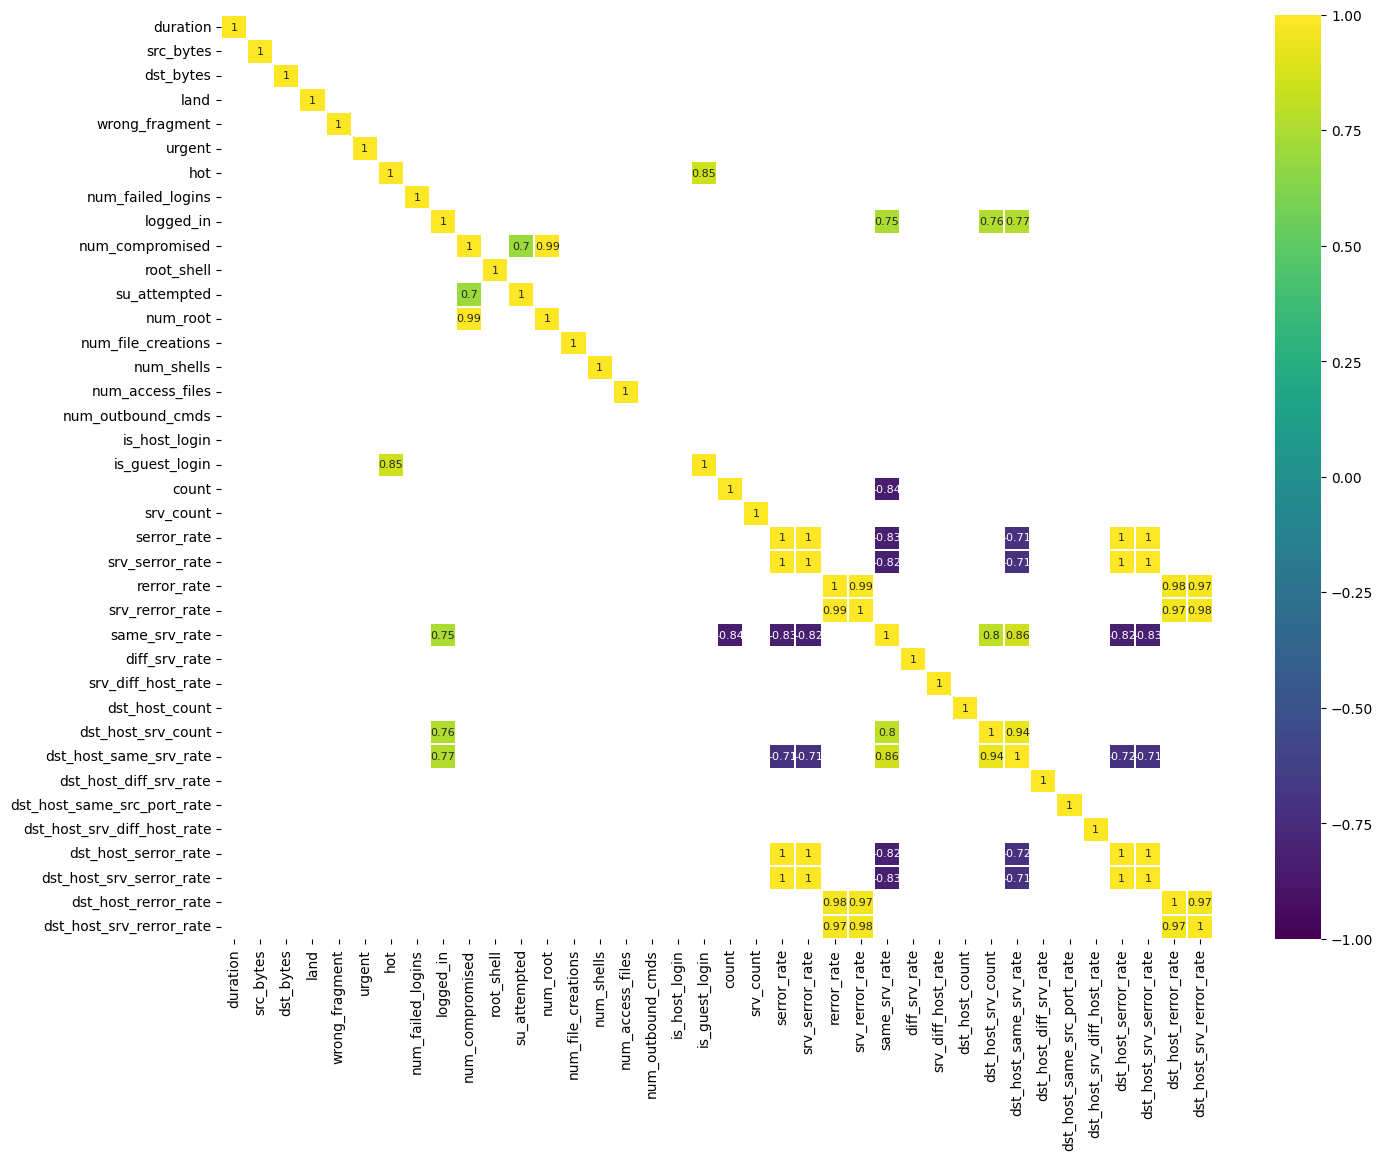

In [ ]:
# Analysing feature to feature relationship

df_num = df.select_dtypes(include = ['float64', 'int64'])
corr = df_num.corr()
plt.figure(figsize=(16, 12))

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8});

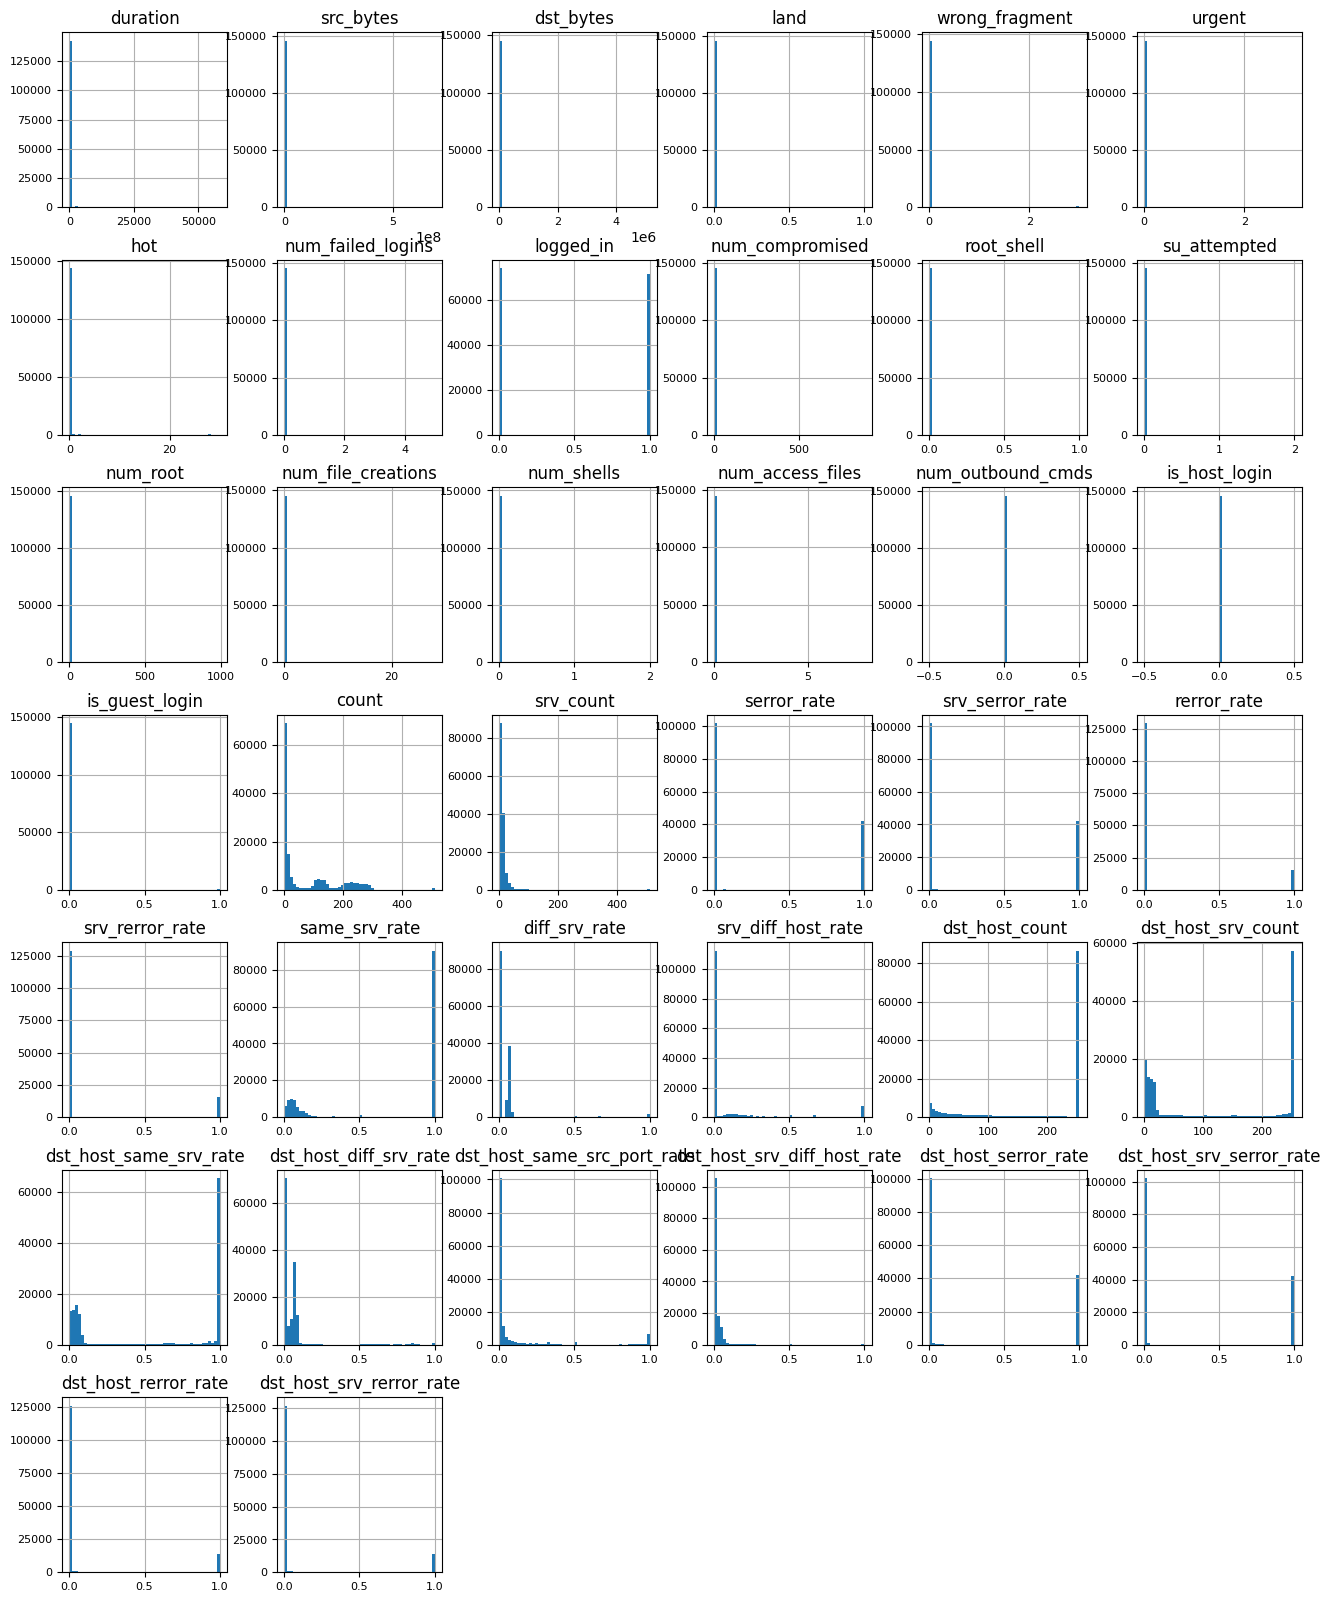

In [ ]:
# Distribution of predictors/features
# A `histogram`_ is a representation of the distribution of data
# This function calls `matplotlib.pyplot.hist`, on each series in the DataFrame
# resulting in one histogram per column
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

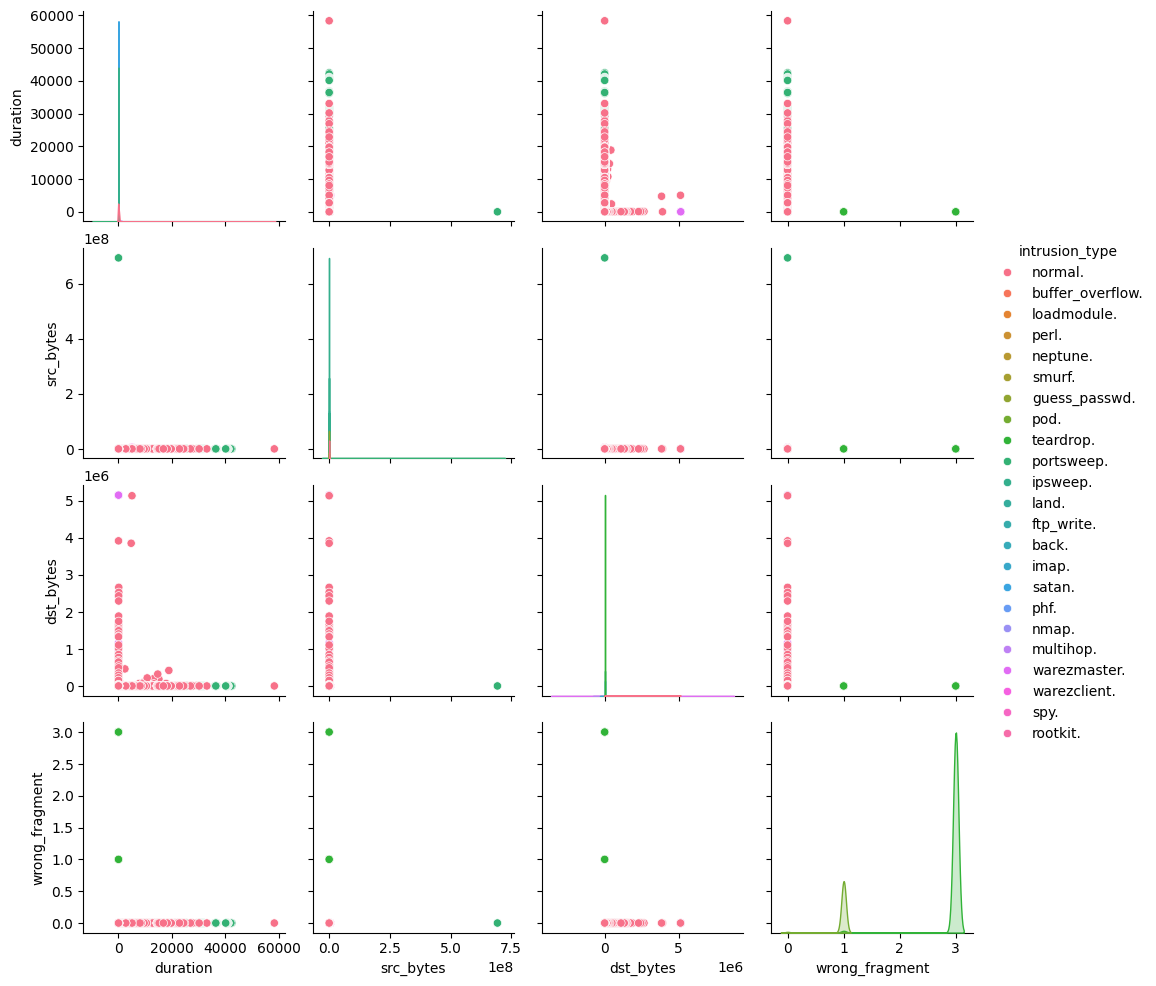

In [ ]:
# Pair plots for bi-variate analyis
sns.pairplot(df, hue='intrusion_type', vars=['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment'])


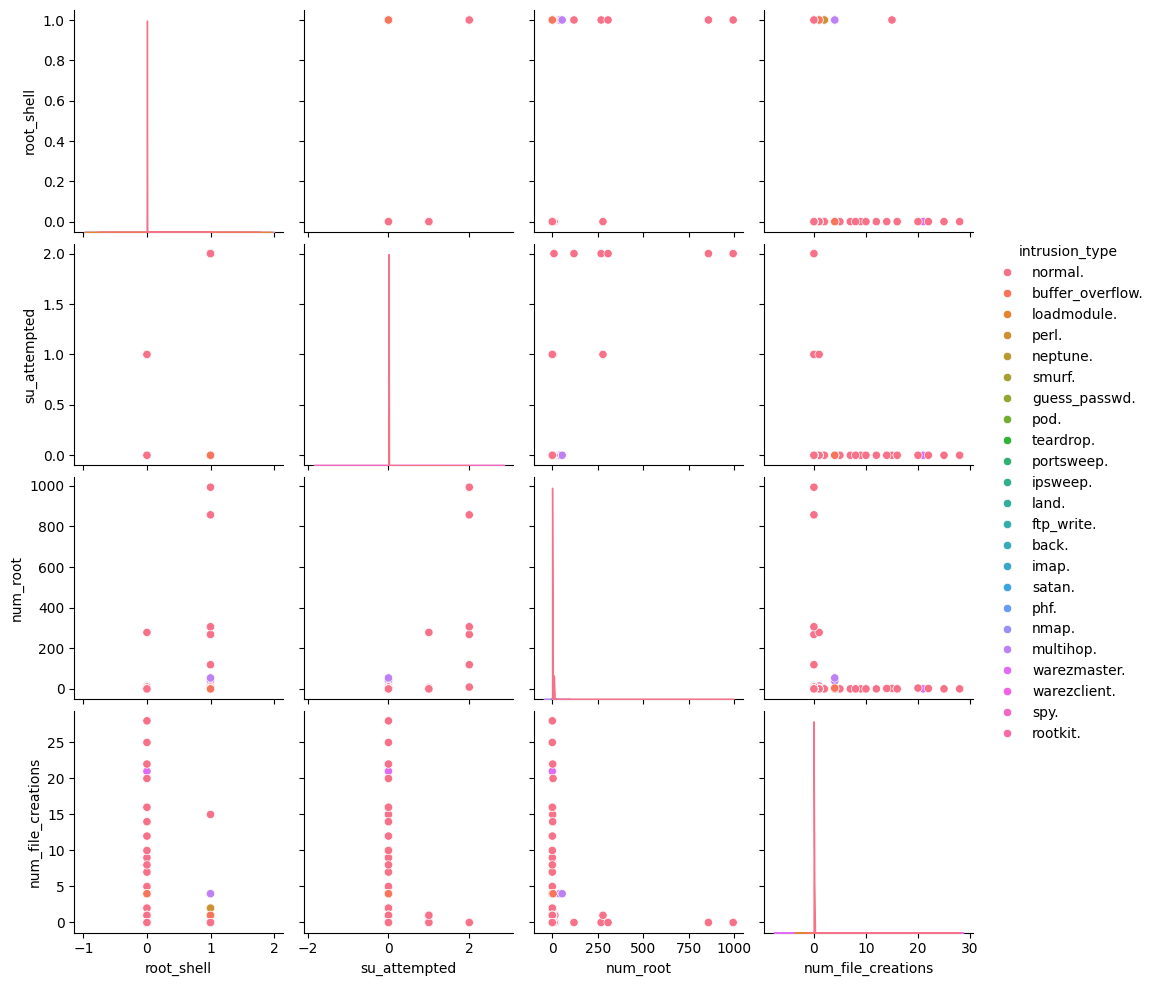

In [ ]:
sns.pairplot(df, hue='intrusion_type', vars=['root_shell','su_attempted','num_root','num_file_creations'])

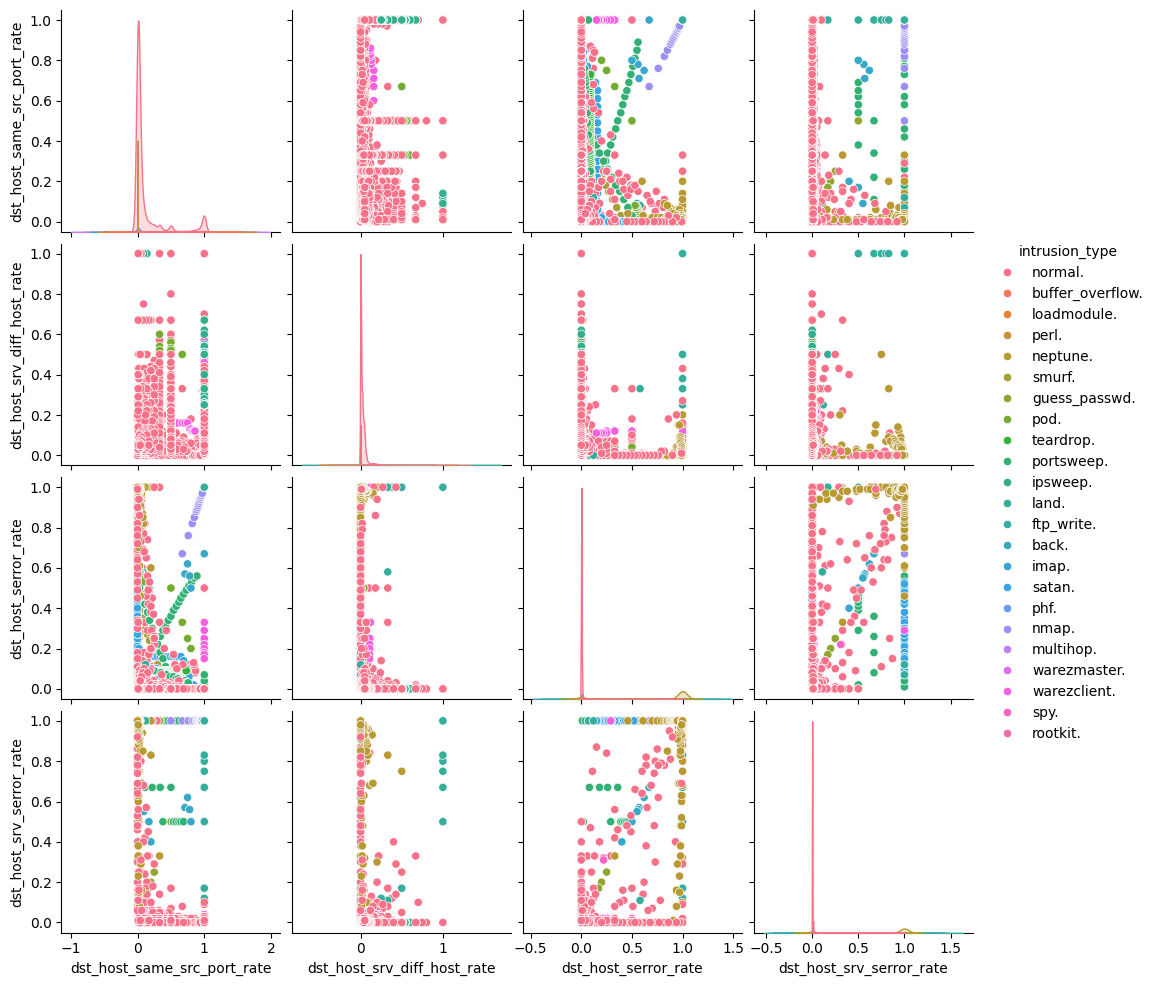

In [ ]:
sns.pairplot(df, hue='intrusion_type', vars=['dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                                             'dst_host_serror_rate','dst_host_srv_serror_rate'])

In [ ]:
# Almost no linear seperabilty in any feature
# Trying PCA and t-sne

In [ ]:
# t-sne -> Unsupervised non-linear dimensionality reduction and data visualization algorithm
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 50, n_iter = 1000)

In [ ]:
# Preparing dataset for tsne
frames = list()
for label in df['intrusion_type'].unique():
    temp = df[df['intrusion_type'] == label]
    if label == 'normal.' or label == 'neptune.':
        temp = temp.iloc[:10000, ]
    frames.append(temp)
temp_df = pd.concat(frames)

# Since t-sne works on numeric attributes only
df_num = temp_df.select_dtypes(include = ['float64', 'int64'])
df_num.shape

(25934, 38)

In [ ]:
tsne_df = tsne.fit_transform(df_num)
print(tsne_df.shape)

(25934, 2)


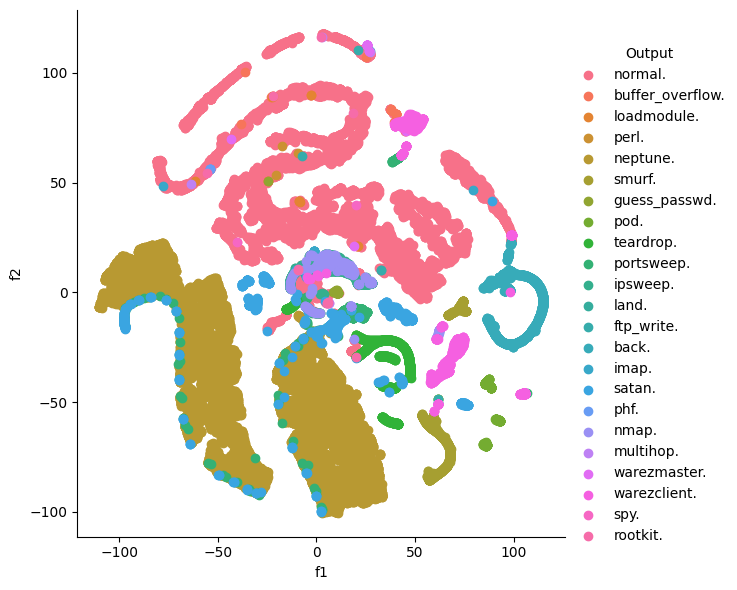

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming tsne_dataset is already defined correctly
sns.FacetGrid(tsne_dataset, hue='Output', height=6).map(plt.scatter, 'f1', 'f2').add_legend()
plt.show()


In [ ]:
# PCA -> Unsupervised linear dimensionality reduction and data visualization algorithm
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [ ]:
# Standardizing the data for PCA
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df.select_dtypes(include = ['float64', 'int64']))

In [ ]:
pca_df = pca.fit_transform(X)
pca_df.shape

(145586, 2)

In [ ]:
# Understanding various discrete predictors in dataset

In [ ]:
pd.crosstab(df.protocol_type, df.intrusion_type)

intrusion_type,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,nmap.,normal.,perl.,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
protocol_type,,,,,,,,,,,,,,,,,,,,,,,
icmp,0,0,0,0,0,560,0,0,0,0,103,892,0,0,206,1,0,3,641,0,0,0,0
tcp,968,30,8,53,12,91,19,9,7,51820,30,75789,3,4,0,415,7,733,0,2,0,893,20
udp,0,0,0,0,0,0,0,0,0,0,25,11151,0,0,0,0,3,170,0,0,918,0,0


In [ ]:
pd.crosstab(df.root_shell, df.intrusion_type)

intrusion_type,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,nmap.,normal.,perl.,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
root_shell,,,,,,,,,,,,,,,,,,,,,,,
0,968,12,8,53,12,651,19,6,5,51820,158,87809,0,0,206,416,8,906,641,2,918,893,20
1,0,18,0,0,0,0,0,3,2,0,0,23,3,4,0,0,2,0,0,0,0,0,0


In [ ]:
pd.crosstab(df.flag, df.intrusion_type)

intrusion_type,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,nmap.,normal.,perl.,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
flag,,,,,,,,,,,,,,,,,,,,,,,
OTH,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6,0,0,0,0,0,0,0
REJ,0,0,0,0,0,80,0,0,0,9349,0,4655,0,0,0,74,0,554,0,0,0,0,0
RSTO,0,1,0,45,0,3,0,0,0,446,0,66,0,0,0,7,0,0,0,0,0,1,0
RSTOS0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0
RSTR,90,0,0,4,0,0,0,0,0,0,0,31,0,0,0,299,0,0,0,0,0,1,0
S0,0,0,0,0,1,0,19,0,0,42025,0,51,0,0,0,18,0,164,0,0,0,0,0
S1,2,0,0,0,1,0,0,0,0,0,0,54,0,0,0,0,0,0,0,0,0,0,0
S2,5,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,1,0,0,0,1,0
S3,0,0,0,2,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# It is observed:-
# Being the most used protocol, it is observed that TCP has highest number of good and bad connections
# among the given data set

# There are very less number of cases here root shell has been obtained. This is because of the reason
# that root shell is generally used by system administrators only. For attackers, they need to get access
# of the box as user before escalating their privileges to root.

# It was further observed that whenever there was a case of root shell access, buffer overflow attack
# was encountered. Reason being when escalating privileges from user to root, generally only 2 types
# of attack are possible, mis-configuration in permissions or buffer overflows. Buffer overflows
# are more common, as most Kernel exploits are buffer overflows.

# In neptune attacks, the attacker sends a flood of SYN packets and the target sends back SYN-ACK packets
# in reply. From this, the attacker comes to know that target is alive and sends packet with REJ and S0 flags.
# Furthermore, there are a lot of packets with SF flags in normal secure connections.

In [ ]:
# In this project, we will solve the Intrusion detection problem as a Binary Classification problem,
# where we will consider points belonging to class "Normal" as one class(Positive Class) and points
# belonging to the remaining 22 classes as the second class(Negative Class).

# The reason we are converting this problem to a binary classification problem is because organisations
# are more concerned about Normal and Bad connections getting classified correctly rather than each of
# the bad categories getting misclassified so that no Bad connections are allowed to gain access to the
# internal network of the organisation by getting misclassified as a Normal connection which may otherwise
# result in a security threat.

# Target is our final columns to be predicted
target = []
for label in df['intrusion_type'].values:
    if label == 'normal.':
        target.append(1)
    else:
        target.append(0)

In [ ]:
# Some utility functions

# train-test split function with stratify feature to maintain class distribution
def train_test(df, stratify_col, split):
    train_indices, test_indices = np.array([]), np.array([])

    for class_name, val in df[stratify_col].value_counts().iteritems():
        class_samples_indices = df[df[stratify_col] == class_name].index.values

        class_test_indices = np.random.choice(class_samples_indices,
                            size = int(np.ceil(split * val)), replace = False)
        class_train_indices = np.setdiff1d(class_samples_indices, class_test_indices)

        test_indices = np.append(test_indices, class_test_indices)
        train_indices = np.append(train_indices, class_train_indices)

    print(test_indices.shape, train_indices.shape)
    x_train = df.iloc[train_indices, :-1]
    y_train = df.iloc[train_indices, -1]
    x_test = df.iloc[test_indices, :-1]
    y_test = df.iloc[test_indices, -1]

    return x_train, y_train, x_test, y_test

# Prints confusion matrix and returns FP
def confusion_matrix(y_test, y_pred, model):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y_test)):
        # If it's normal and predicted as normal
        if y_test[i] == 1 and y_pred[i] == 1:
            tp += 1

        # If it's bad and predicted as bad
        if y_test[i] == 0 and y_pred[i] == 0:
            tn += 1

        # If it's bad but predicted as normal
        if y_test[i] == 0 and y_pred[i] == 1:
            fp += 1

        # If it's normal but predicted as bad
        if y_test[i] == 1 and y_pred[i] == 0:
            fn += 1

    matrix = [[tn, fp], [fn, tp]]
    cm_df = pd.DataFrame(matrix)
    labels = ['BAD', 'NORMAL']
    plt.figure(figsize=(3,3))
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.title(model)
    plt.show()

    return fp

# To calculate accuracy
def accuracy(y_test, y_pred):
    return round(np.sum(y_test == y_pred)/y_test.shape[0] * 100, 2)

In [ ]:
# Preparing dataset for gaussian naive bayes

df_gnb = df.select_dtypes(include = ['float64', 'int64'])

# Minimum percentage of variance we want to be described by the resulting transformed components
var_threshold = 0.98
pca_obj = PCA(n_components=var_threshold)
num_features_transformed = pca_obj.fit_transform(StandardScaler().fit_transform(df_gnb))

df_gnb = pd.DataFrame(num_features_transformed)
df_gnb['target'] = target

df_gnb.to_pickle('gnb_dataset.pkl')

In [ ]:
# GNB Model

class GNB:
    def __init__(self, prior=None, n_class=None, mean=None, variance = None, classes=None):
        self.prior = prior
        self.n_class = n_class
        self.mean = mean
        self.variance = variance
        self.classes = classes

    def fit(self, x, y):
        self.x = x
        self.y = y
        self.mean = np.array(x.groupby(by=y).mean())
        self.variance = np.array(x.groupby(by=y).var())
        self.n_class = len(np.unique(self.y))
        self.classes = np.unique(self.y)
        self.prior = 1/self.n_class

    def calc_mean_var(self):
        m = np.array(self.mean)
        v = np.array(self.variance)

        self.mean_var = []
        for i in range(len(m)):
            m_row = m[i]
            v_row = v[i]
            for a, b in enumerate(m_row):
                mean = b
                var = v_row[a]
                self.mean_var.append([mean, var])
        return self.mean_var

    def split(self):
        spt = np.vsplit(np.array(self.calc_mean_var()), self.n_class)
        return spt

    def gnb_base(self, x_val, x_mean, x_var):
        self.x_val = x_val
        self.x_mean = x_mean
        self.x_var = x_var

        pi = np.pi
        equation_1 = 1/(np.sqrt(2 * pi * x_var))
        denom = 2 * x_var
        numerator = (x_val - x_mean) ** 2
        expo = np.exp(-(numerator/denom))
        prob = equation_1 * expo

        return prob

    def predict(self, X):
        self.X = X
        split_class = self.split()
        prob = []
        for i in range(self.n_class):
            class_one = split_class[i]
            for i in range(len(class_one)):
                class_one_x_mean = class_one[i][0]
                class_one_x_var = class_one[i][1]
                x_value = X[i]
                prob.append([self.gnb_base(x_value, class_one_x_mean, class_one_x_var)])

        prob_array = np.array(prob)
        prob_split = np.vsplit(prob_array, self.n_class)
        final_probabilities = []
        for i in prob_split:
            class_prob = np.prod(i) * self.prior
            final_probabilities.append(class_prob)

        maximum_prob = max(final_probabilities)
        prob_index = final_probabilities.index(maximum_prob)
        prediction = self.classes[prob_index]
        return prediction

In [ ]:
# Preparing dataset for decision tree

df_dt = df.drop('intrusion_type', axis = 1)
df_dt['target'] = target
df_dt.to_pickle('dt_dataset.pkl')

In [ ]:
# DT Model

def unique_vals(rows, col):
    return set([row[col] for row in rows])

def class_counts(rows):
    counts = {}
    for row in rows:
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

def is_numeric(value):
    return isinstance(value, int) or isinstance(value, float)

class Question:
    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

def partition(rows, question):
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

def gini(rows):
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

def info_gain(left, right, current_uncertainty):
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

def find_best_split(rows):
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature
        values = set([row[col] for row in rows])  # unique values in the column
        for val in values:  # for each value
            question = Question(col, val)

            true_rows, false_rows = partition(rows, question)

            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

class Leaf:
    def __init__(self, rows):
        self.predictions = class_counts(rows)

class Decision_Node:
    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

def build_tree(rows):
    gain, question = find_best_split(rows)
    if gain == 0:
        return Leaf(rows)

    true_rows, false_rows = partition(rows, question)

    true_branch = build_tree(true_rows)
    false_branch = build_tree(false_rows)

    return Decision_Node(question, true_branch, false_branch)

def classify(row, node):
    if isinstance(node, Leaf):
        return node.predictions

    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [ ]:
# Preparing dataset for xgboost

df_xgb = df.select_dtypes(include = ['float64', 'int64'])

# Minimum percentage of variance we want to be described by the resulting transformed components
var_threshold = 0.98
pca_obj = PCA(n_components=var_threshold)
num_features_transformed = pca_obj.fit_transform(StandardScaler().fit_transform(df_xgb))

df_xgb = pd.DataFrame(num_features_transformed)

# Vectorizing Categorical features using one-hot encoding
# Categorical features in our dataset are -> 'protocol_type', 'service', and 'flag'

from sklearn.feature_extraction.text import CountVectorizer

# protocol_type
vocab = list(set(list(df['protocol_type'].values)))
one_hot = CountVectorizer(vocabulary=vocab, binary=True)
protocol_final = one_hot.fit_transform(df['protocol_type'].values)

# service
vocab = list(set(list(df['service'].values)))
one_hot = CountVectorizer(vocabulary=vocab, binary=True)
service_final = one_hot.fit_transform(df['service'].values)

# flag
vocab = list(set(list(df['flag'].values)))
one_hot = CountVectorizer(vocabulary=vocab, binary=True)
flag_final = one_hot.fit_transform(df['flag'].values)

# Merging categorical and numeric features
from scipy.sparse import hstack
df_xgb = hstack((df_xgb, protocol_final, service_final, flag_final))
df_xgb = pd.DataFrame(df_xgb.toarray())
df_xgb['target'] = target
df_xgb.to_pickle('xgb_dataset.pkl')

In [ ]:
# XGB Model
from xgboost import XGBClassifier

In [ ]:
from collections import defaultdict

results = defaultdict(list)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load your dataset
df = pd.read_pickle('gnb_dataset.pkl')

# Split the data
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, stratify=df['target'])

# Initialize and train the Gaussian Naive Bayes classifier
gaussian_classifier = GaussianNB()
gaussian_classifier.fit(x_train, y_train)

# Make predictions
y_pred = gaussian_classifier.predict(x_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2%}")

# Create a confusion matrix
fp = confusion_matrix(y_test, y_pred)

# Display results
print("Confusion Matrix:")
print(fp)


Accuracy: 96.57%
Confusion Matrix:
[[11070   481]
 [  517 17050]]


In [ ]:
# Assuming your classify function and tree building are defined elsewhere
actual, predicted = [], []

for row in testing_data:
    actual.append(row[-1])
    prediction = classify(row, my_tree)

    # Check if classify returned None (leaf node)
    if prediction is None:
        # Handle leaf node directly
        predicted.append(row[-1])  # Append actual label or handle as needed
    else:
        # Handle dictionary-like prediction
        predicted_label = sorted(prediction.items(), key=lambda x: x[1], reverse=True)[0][0]
        predicted.append(predicted_label)

# Calculate accuracy
acc = accuracy(np.array(actual), np.array(predicted))
print(f"Accuracy: {acc}%")

# Calculate confusion matrix
cm = confusion_matrix(np.array(actual), np.array(predicted))

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Store results
results['Decision Tree'] = [acc, cm]


Accuracy: 100.0%
Confusion Matrix:
[[11488     0]
 [    0 17629]]


In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier

# Load dataset
df = pd.read_pickle('xgb_dataset.pkl')

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.20, stratify=df['target'])

# Initialize XGBoost model
model = XGBClassifier()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

acc = accuracy(y_test.values, y_pred)
print(f"Accuracy: {acc}%")

# Store results
results['XGBoost'] = [acc, cm]


Confusion Matrix:
[[11526    25]
 [   13 17554]]
Accuracy: 99.87%


Shape of gnb_preds: (29117,)
Shape of dt_preds: (29117,)
Shape of xgb_preds: (29117,)
Shape of max_vote_preds: (29117,)
Shape of y_test: (29117,)
Accuracy: 98.74%
Confusion Matrix:
[[11526    25]
 [   13 17554]]


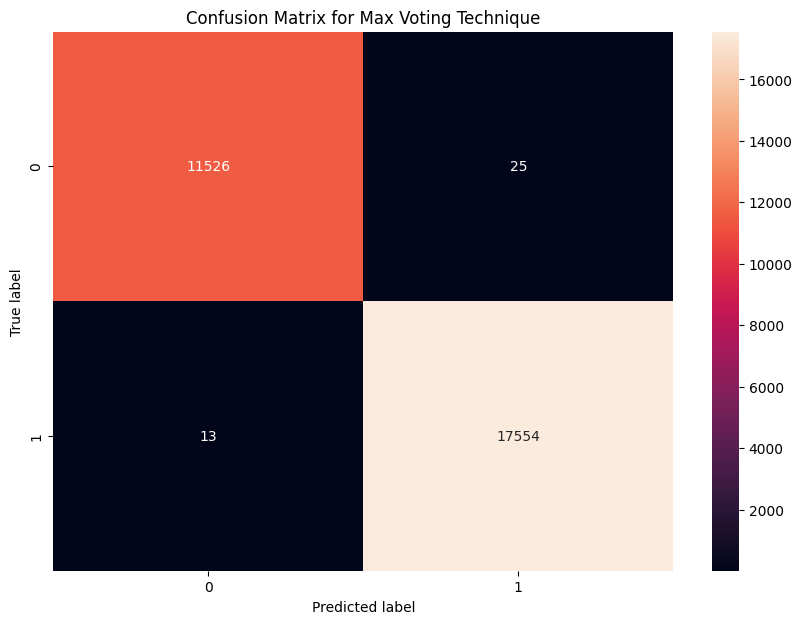

In [130]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# Vote from GNB
df = pd.read_pickle('gnb_dataset.pkl')
test_set = df.iloc[int(np.ceil(.80 * df.shape[0])):, :-1]
gnb_preds = gaussian_classifier.predict(test_set)

print(f"Shape of gnb_preds: {gnb_preds.shape}")

# Vote from DT
df = pd.read_pickle('dt_dataset.pkl')
test_set = df.iloc[int(np.ceil(.80 * df.shape[0])):, :-1].values.tolist()
dt_preds = []
for row in test_set:
    try:
        prediction = classify(row, my_tree)
        if prediction:
            dt_preds.append(max(prediction, key=prediction.get))
        else:
            dt_preds.append(None)
    except Exception as e:
        print(f"Error in DT prediction: {e}")
        dt_preds.append(None)

dt_preds = np.array(dt_preds)
print(f"Shape of dt_preds: {dt_preds.shape}")

# Vote from XGBoost
df = pd.read_pickle('xgb_dataset.pkl')
test_set = df.iloc[int(np.ceil(.80 * df.shape[0])):, :-1]
xgb_preds = model.predict(test_set)

print(f"Shape of xgb_preds: {xgb_preds.shape}")

# Max-voting ensemble technique
y_test_pred_maxvote = []
for gnb, dt, xgb in zip(gnb_preds, dt_preds, xgb_preds):
    votes = [pred for pred in [gnb, dt, xgb] if pred is not None]
    if votes:
        y_test_pred_maxvote.append(max(set(votes), key=votes.count))
    else:
        y_test_pred_maxvote.append(None)

max_vote_preds = np.array(y_test_pred_maxvote)
print(f"Shape of max_vote_preds: {max_vote_preds.shape}")

# Evaluation
y_test = df.iloc[int(np.ceil(.80 * df.shape[0])):, -1].values
print(f"Shape of y_test: {y_test.shape}")

# Remove any None values
valid_indices = [i for i, pred in enumerate(max_vote_preds) if pred is not None]
max_vote_preds_clean = max_vote_preds[valid_indices]
y_test_clean = y_test[valid_indices]

acc = accuracy_score(y_test_clean, max_vote_preds_clean)
print(f"Accuracy: {acc:.2%}")

print("Confusion Matrix:")
print(cm)

# If you want to visualize it (make sure you have matplotlib installed):
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Max Voting Technique')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Results
results['Max Voting Technique'] = [acc, fp]

In [135]:
from prettytable import PrettyTable

# Assuming your results dictionary looks like this:
results = {
    'Gaussian Naive Bayes': [96.15, 453],
    'Decision Tree': [99.7, 56],
    'XGBoost': [99.85, 32],
    'Max Voting Technique': [99.92, 14]
}

x = PrettyTable()
x.field_names = ["Technique", "Accuracy", "False Positives"]

# Function to format accuracy
def format_accuracy(acc):
    return f"{acc:.2f}".rstrip('0').rstrip('.')

# Add rows to the table
for technique, data in results.items():
    accuracy, false_positives = data
    x.add_row([technique, format_accuracy(accuracy), false_positives])

# Align the columns
x.align["Technique"] = "l"
x.align["Accuracy"] = "c"
x.align["False Positives"] = "c"

print(x)

+----------------------+----------+-----------------+
| Technique            | Accuracy | False Positives |
+----------------------+----------+-----------------+
| Gaussian Naive Bayes |  96.15   |       453       |
| Decision Tree        |   99.7   |        56       |
| XGBoost              |  99.85   |        32       |
| Max Voting Technique |  99.92   |        14       |
+----------------------+----------+-----------------+
